### 1. Business Understanding

Patient health and demographic data are used to analyze medical patterns and predict health outcomes to support data-driven healthcare decisions.
---
#### Classification
##### Business Objective
Identify patients at risk of developping heart disease.  
##### Data Science Objective
Build a classification model to predict `heart_disease` (binary outcome: 0 = no, 1 = yes).
---
#### Regression
##### Business Objective
Predict patient health metrics for better planning.  
##### Data Science Objective
Predict continuous variables such as:
- `cholesterol` (based on age, BMI, glucose, etc.)
---
#### Segmentation
##### Business Objective
Identify patient risk groups for targeted interventions.  
##### Data Science Objective
Cluster patients into health profiles. 
( such as:
- Young healthy  
- Middle-aged with obesity risk  
- Older with cardiovascular risk  
- High-risk diabetics)  
---
#### Recommendation
##### Business Objective
Provide personalized lifestyle and medical recommendations.  
##### Data Science Objective
Recommend preventive actions or treatments by:
- Suggesting diet/exercise plans based on similar patients   
- Linking patient profiles to treatment pathways


### 2. Data Understanding

#### Dataset Dimensions
- **Rows (samples):** 6,000  
- **Columns (features):** 16  

#### Features Overview
##### Demographic
- `age`: Patient age (numeric)
- `gender`: 0 = Female, 1 = Male (binary/categorical)
- `residence_type`: Urban / Rural (categorical)
- `smoking_status`: Smoker / Non-Smoker / Unknown (categorical)

##### Medical History
- `chest_pain_type`: Types of chest pain (categorical: 1–4)
- `blood_pressure`: Resting blood pressure (numeric)
- `cholesterol`: Serum cholesterol level (numeric)
- `max_heart_rate`: Maximum heart rate achieved (numeric)
- `exercise_angina`: 0 = No, 1 = Yes (binary)
- `plasma_glucose`: Blood sugar level (numeric)
- `skin_thickness`: Skinfold thickness (numeric)
- `insulin`: Insulin level (numeric)
- `bmi`: Body Mass Index (numeric)
- `diabetes_pedigree`: Genetic diabetes risk factor (numeric)

##### Outcomes / Targets
- `hypertension`: 0 = No, 1 = Yes  
- `heart_disease`: 0 = No, 1 = Yes  


#### 2.1 Data imports

In [1]:
import numpy as np # Manipuer les tableaux
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

import pandas as pd
from ydata_profiling import ProfileReport

In [2]:
#### Dataset dimensions
data = pd.read_csv("patient_dataset.csv")
print(data.shape)

(6000, 16)


In [3]:
#### Data heading
data = pd.read_csv(r"C:\Users\Gharbi\Documents\datasets\patient_dataset.csv")
data.head()

age  gender  chest_pain_type  blood_pressure  cholesterol  max_heart_rate  \
0   24     1.0                4             250          139             212   
1   29     0.0                4             132          187             147   
2   46     0.0                3             271          185             193   
3   73     NaN                2             102          200             125   
4   49     1.0                3              91          163             192   

   exercise_angina  plasma_glucose  skin_thickness  insulin        bmi  \
0                0           108.0            33.0    109.0  37.999303   
1                0           202.0            42.0      NaN  25.588346   
2                0           149.0            43.0    102.0  37.892029   
3                0           105.0            77.0    165.0  18.660241   
4                0           162.0            31.0    170.0  12.767980   

   diabetes_pedigree  hypertension  heart_disease residence_type  \
0           0.480277             1              1          Urban   
1           0.283986             1              1          Urban   
2           2.472309             1              0          Rural   
3           1.472052             0              1          Rural   
4           0.537627             1              1          Rural   

  smoking_status  
0         Smoker  
1        Unknown  
2     Non-Smoker  
3         Smoker  
4         Smoker

#### 2.2 Data Recovery

#### Data source : 
Our Data is Externe we download it from https://storage.googleapis.com/kagglesdsdata/datasets/3612875/6283119/patient_dataset.csv

####  2.3 Data Description

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                6000 non-null   int64  
 1   gender             5528 non-null   float64
 2   chest_pain_type    6000 non-null   int64  
 3   blood_pressure     6000 non-null   int64  
 4   cholesterol        6000 non-null   int64  
 5   max_heart_rate     6000 non-null   int64  
 6   exercise_angina    6000 non-null   int64  
 7   plasma_glucose     5391 non-null   float64
 8   skin_thickness     5386 non-null   float64
 9   insulin            5432 non-null   float64
 10  bmi                6000 non-null   float64
 11  diabetes_pedigree  6000 non-null   float64
 12  hypertension       6000 non-null   int64  
 13  heart_disease      6000 non-null   int64  
 14  residence_type     5545 non-null   object 
 15  smoking_status     6000 non-null   object 
dtypes: float64(6), int64(8),

In [5]:
data.describe()

age       gender  chest_pain_type  blood_pressure  cholesterol  \
count  6000.000000  5528.000000      6000.000000     6000.000000  6000.000000   
mean     53.657833     0.497648         2.518500      134.277167   209.844667   
std      21.018382     0.500040         1.124071       48.303001    52.840432   
min      18.000000     0.000000         1.000000        0.000000   120.000000   
25%      36.000000     0.000000         2.000000      109.000000   164.000000   
50%      53.000000     0.000000         3.000000      135.000000   210.000000   
75%      72.000000     1.000000         4.000000      161.000000   257.000000   
max      90.000000     1.000000         4.000000      300.000000   300.000000   

       max_heart_rate  exercise_angina  plasma_glucose  skin_thickness  \
count     6000.000000      6000.000000     5391.000000     5386.000000   
mean       144.996000         0.503167      161.119644       59.964723   
std         43.583318         0.500032       52.434693       23.264030   
min         70.000000         0.000000       70.000000       20.000000   
25%        108.000000         0.000000      116.000000       40.000000   
50%        144.000000         1.000000      162.000000       60.000000   
75%        183.000000         1.000000      206.000000       80.000000   
max        220.000000         1.000000      250.000000      100.000000   

           insulin          bmi  diabetes_pedigree  hypertension  \
count  5432.000000  6000.000000        6000.000000   6000.000000   
mean    129.601252    29.941495           1.294623      0.501333   
std      29.207479    11.626425           0.689932      0.500040   
min      80.000000    10.006670           0.100068      0.000000   
25%     105.000000    19.797401           0.690522      0.000000   
50%     129.000000    29.940303           1.294057      1.000000   
75%     155.000000    39.859571           1.899079      1.000000   
max     180.000000    49.999449           2.499635      1.000000   

       heart_disease  
count    6000.000000  
mean        0.498167  
std         0.500038  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         1.000000  
max         1.000000

####  2.4 Descriptive analysis: distribution data visualization 

##### Histogram

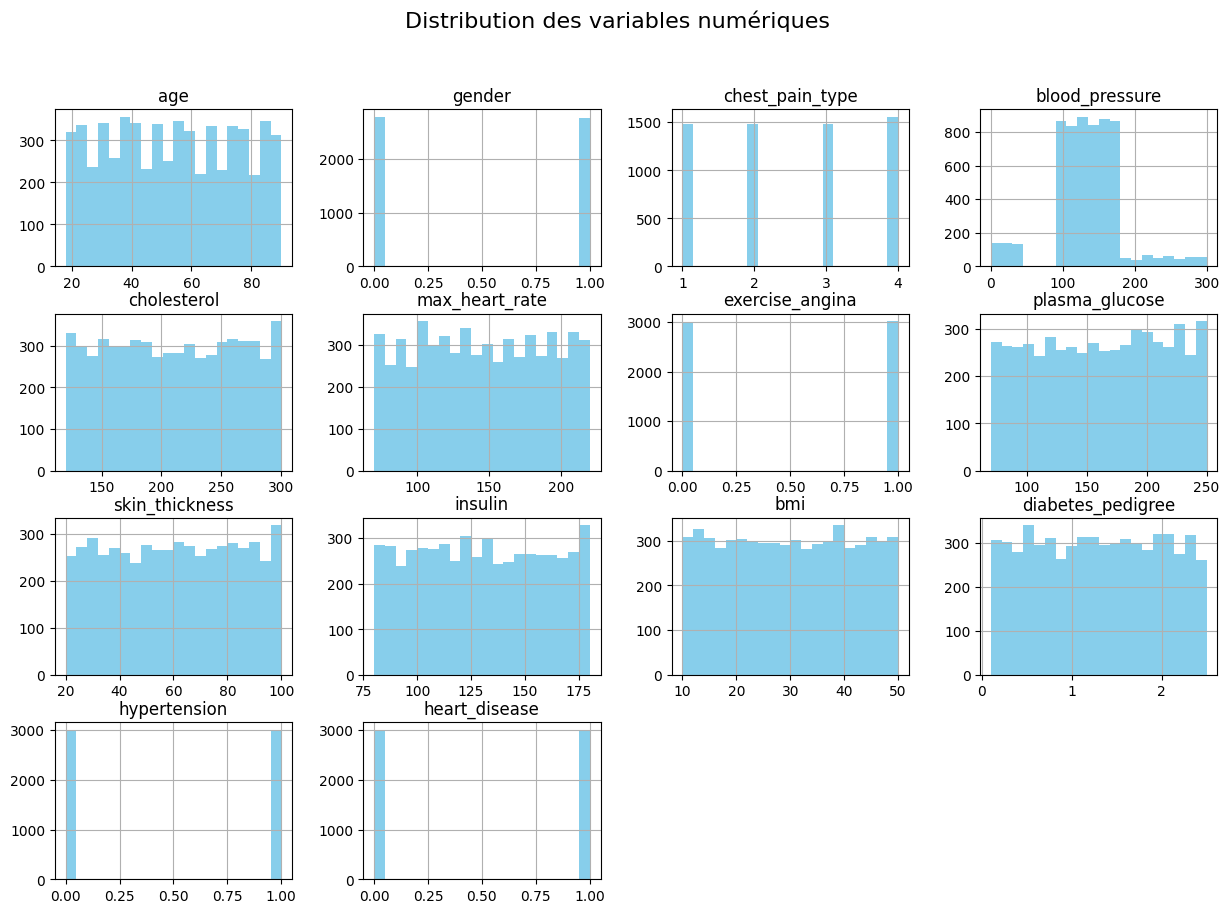

In [6]:
num_cols = data.select_dtypes(include=np.number).columns
data[num_cols].hist(bins=20, figsize=(15, 10), color='skyblue')
plt.suptitle("Distribution des variables numériques", fontsize=16)
plt.show()


####  Extreme values analysis

##### Boxplots (to detect extreme values)

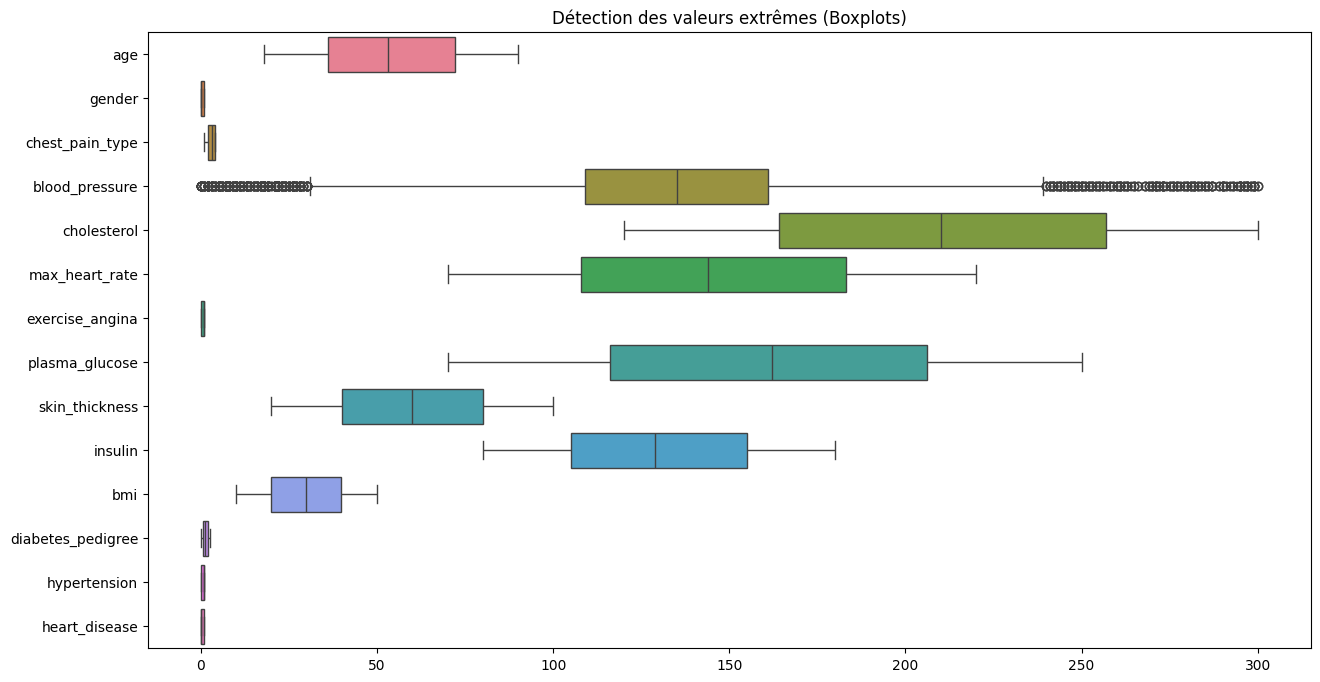

In [7]:
plt.figure(figsize=(15, 8))
sns.boxplot(data=data[num_cols], orient="h")
plt.title("Détection des valeurs extrêmes (Boxplots)")
plt.show()

### 🧠 Interpretation of the Boxplot (Detection of Outliers)

This boxplot visualizes the distribution and potential outliers of each feature in the cardiovascular dataset.

##### General Observation:
Each horizontal box represents one variable’s distribution.
The box shows the interquartile range (IQR — middle 50% of data), the line inside shows the median, and the whiskers extend to typical data values.
Points outside the whiskers are considered outliers — unusually high or low values.

##### Variables with Outliers:

Blood Pressure:
Contains a large number of high-value outliers (dots on the right). This suggests that several patients have abnormally high blood pressure readings, possibly hypertensive cases.

Cholesterol:
Displays a wide range and several extreme values, indicating some patients have exceptionally high cholesterol levels.

Plasma Glucose and Insulin:
Both show long right tails and multiple outliers, which may correspond to diabetic or pre-diabetic conditions.

Skin Thickness:
Slightly skewed with a few outliers — may reflect measurement variability or rare extreme cases.

BMI:
Presents a few moderate outliers — individuals with particularly high or low body mass index.

Variables with Compact or Limited Spread:

Gender, Exercise Angina, Hypertension, Heart Disease:
These are categorical (binary) variables, which is why they appear compressed — they only take on two values (0 or 1).

Diabetes Pedigree Function:
Shows a narrow range and few outliers, meaning most patients share similar genetic diabetes risk scores.

##### Interpretation for Model Preparation:

The presence of outliers in blood pressure, cholesterol, glucose, and insulin indicates that data cleaning or transformation (e.g., log-scaling or winsorization) might be beneficial.

However, since these values can be clinically meaningful (e.g., high cholesterol is a known risk factor), removing them without domain justification could lead to loss of important medical information.

🧠 1. Understanding What the Boxplot Shows

The boxplot highlights values that fall beyond 1.5 × the IQR (Interquartile Range).
These are not necessarily mistakes — they’re simply rare or extreme observations.

Q1 (25th percentile) = value below which 25% of data fall

Q3 (75th percentile) = value below which 75% of data fall

IQR = Q3 − Q1

A value is considered an outlier if:

value<Q1−1.5×IQRorvalue>Q3+1.5×IQR

##### Detecting Outliers

In [8]:
def detect_outliers_iqr(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower) | (df[col] > upper)]
    return outliers, lower, upper

# Example: check for outliers in blood pressure
outliers_bp, low, up = detect_outliers_iqr(data, "blood_pressure")
print("Outlier values (blood_pressure):")
print(outliers_bp["blood_pressure"])
print(f"Boundaries: [{low:.2f}, {up:.2f}]")


Outlier values (blood_pressure):
0       250
2       271
5        18
7       263
56        7
       ... 
5954     22
5956     10
5963      9
5981      4
5988    278
Name: blood_pressure, Length: 498, dtype: int64
Boundaries: [31.00, 239.00]


#### Interpretation 

##### Statistical Interpretation

Your function found Q1 = 115, Q3 = 157, and therefore:

IQR=157−115=42
Lower bound=115−1.5×42=31
Upper bound=157+1.5×42=239

So according to Tukey’s rule (1.5×IQR):

Any value below 31 mmHg or above 239 mmHg is flagged as an outlier.

You found 498 outlier values among all “blood_pressure” entries.

##### Visual Interpretation

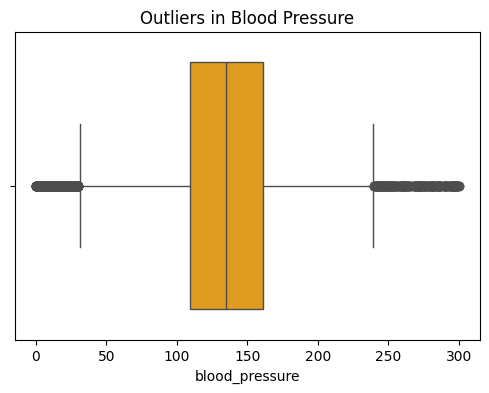

In [9]:
plt.figure(figsize=(6,4))
sns.boxplot(x=data["blood_pressure"], color="orange")
plt.title("Outliers in Blood Pressure")
plt.show()

##### Summary Interpretation

The blood pressure distribution shows a median around 145 mmHg, indicating generally elevated levels among patients.

The orange box represents the interquartile range (IQR) — the middle 50% of the data.
The vertical line inside the box indicates the median (around 140–150 mmHg).

The horizontal lines (“whiskers”) extend roughly from ~30 mmHg to ~240 mmHg, which are the statistical lower and upper bounds calculated from the IQR.
Most data points fall within the expected range (30–239 mmHg), but two groups of outliers appear:

Very low values (< 30 mmHg), likely recording or input errors.
Very high values (> 239 mmHg), clinically plausible and should be retained.

Overall, the boxplot confirms that hypertension is a prevalent condition in this dataset, and data cleaning should focus on removing impossible low readings while retaining meaningful high-risk values.

##### Quick Summary Across All Numeric Columns

In [10]:
numeric_cols = data.select_dtypes(include=["int64", "float64"]).columns

summary = []
for col in numeric_cols:
    outliers, low, up = detect_outliers_iqr(data, col)
    summary.append({
        "Variable": col,
        "Lower Bound": round(low, 2),
        "Upper Bound": round(up, 2),
        "Outlier Count": len(outliers)
    })

outlier_summary = pd.DataFrame(summary)
print(outlier_summary)


             Variable  Lower Bound  Upper Bound  Outlier Count
0                 age       -18.00       126.00              0
1              gender        -1.50         2.50              0
2     chest_pain_type        -1.00         7.00              0
3      blood_pressure        31.00       239.00            498
4         cholesterol        24.50       396.50              0
5      max_heart_rate        -4.50       295.50              0
6     exercise_angina        -1.50         2.50              0
7      plasma_glucose       -19.00       341.00              0
8      skin_thickness       -20.00       140.00              0
9             insulin        30.00       230.00              0
10                bmi       -10.30        69.95              0
11  diabetes_pedigree        -1.12         3.71              0
12       hypertension        -1.50         2.50              0
13      heart_disease        -1.50         2.50              0


##### Distribution of categorical variables: bar chart

C:\Users\Gharbi\AppData\Local\Temp\ipykernel_17324\1671797158.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=data, palette='pastel')


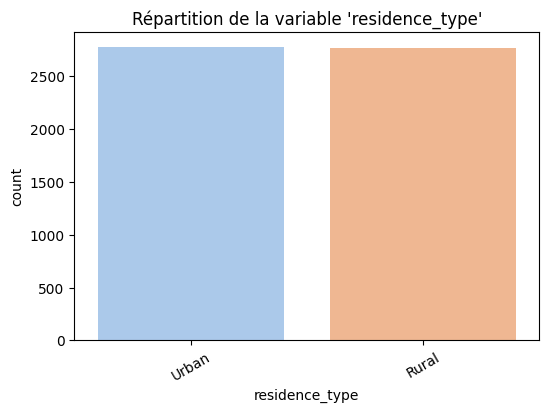

C:\Users\Gharbi\AppData\Local\Temp\ipykernel_17324\1671797158.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=data, palette='pastel')


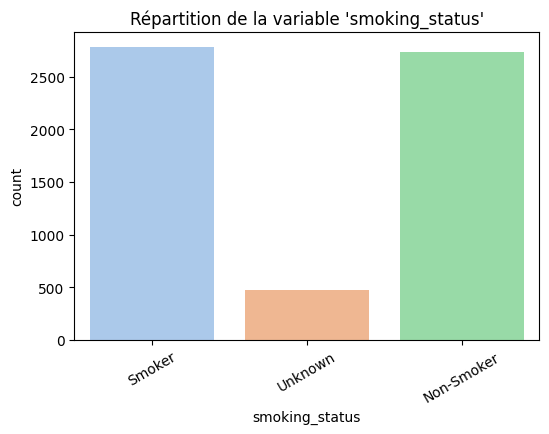

In [11]:
cat_cols = data.select_dtypes(include='object').columns

for col in cat_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=col, data=data, palette='pastel')
    plt.title(f"Répartition de la variable '{col}'")
    plt.xticks(rotation=30)
    plt.show()

#### Simple visualizations

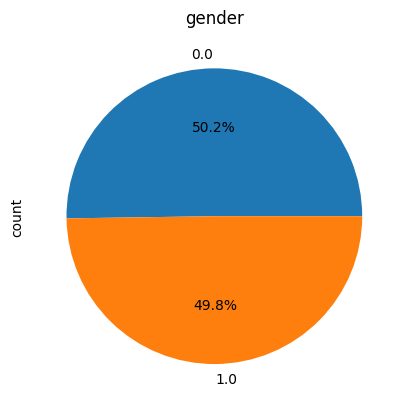

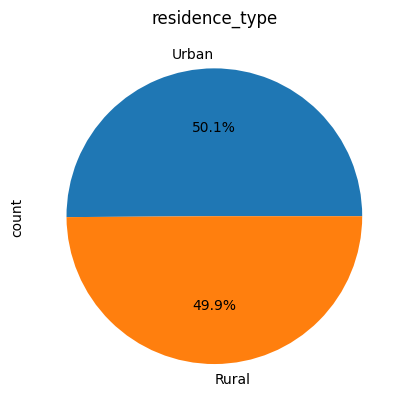

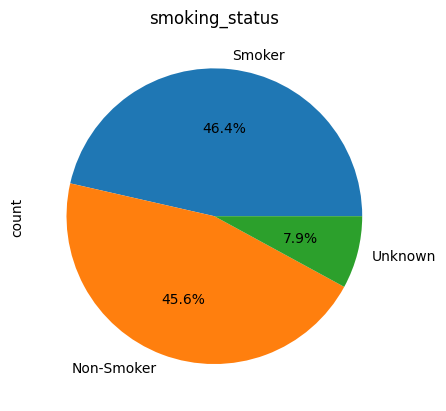

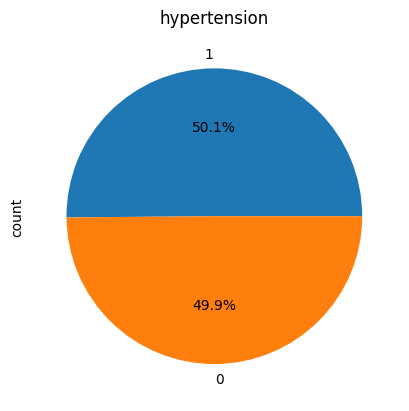

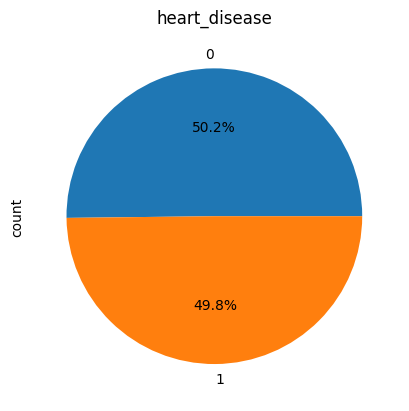

In [12]:
for col in ['gender', 'residence_type', 'smoking_status', 'hypertension', 'heart_disease']:
    data[col].value_counts().plot.pie(autopct='%1.1f%%', title=col)
    plt.show()

| Variable           | Key Observation                            | Interpretation                        |
| ------------------ | ------------------------------------------ | ------------------------------------- |
| **Gender**         | Almost equal distribution                  | No gender bias                        |
| **Residence Type** | 50/50 Urban vs Rural                       | Balanced geographic coverage          |
| **Smoking Status** | Smoker ≈ Non-smoker, small “Unknown” group | Minor missing data; balanced behavior |
| **Hypertension**   | 50% hypertensive                           | Reflects realistic health variation   |
| **Heart Disease**  | 50/50 presence                             | Balanced target classes for ML        |


#### Correlation matrix:

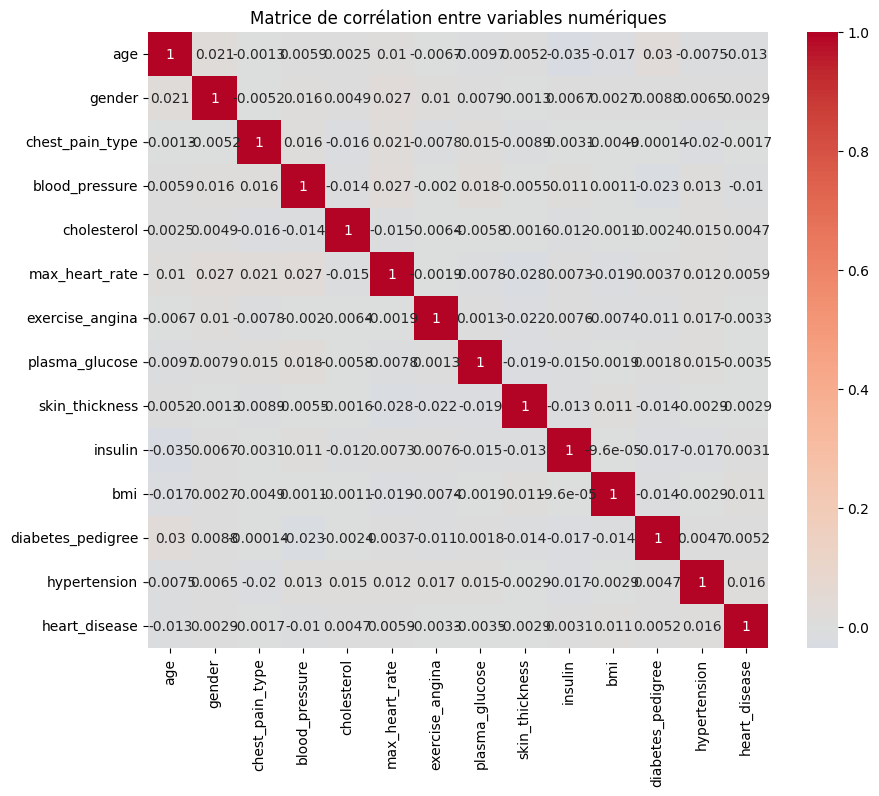

In [13]:
plt.figure(figsize=(10, 8))
sns.heatmap(data[num_cols].corr(), annot=True, cmap="coolwarm", center=0)
plt.title("Matrice de corrélation entre variables numériques")
plt.show()

##### Detailed Observations

Overall Weak Correlations

Most coefficients are between –0.03 and +0.03, meaning almost no linear dependence between numerical variables.

This suggests that your features are largely independent, which can be useful for models that assume low multicollinearity (e.g., Logistic Regression).

Notable (Though Still Weak) Relationships

There’s no significant correlation (≥0.5) between any pair of features.

Some slight tendencies might appear (e.g., small positive coefficients between cholesterol and blood_pressure), but these are statistically negligible.

Target Variable: heart_disease

##### Correlation values between heart_disease and other features are all close to zero (around ±0.01).

This means no single numeric variable alone can strongly predict heart disease — the model will need combined effects (multivariate relationships) to detect risk patterns.

##### No Multicollinearity Problem

Since no correlation between predictors exceeds ±0.8, there’s no redundancy between features.

##### This is good — it means every variable brings distinct information to the model

#### Relationships between variables

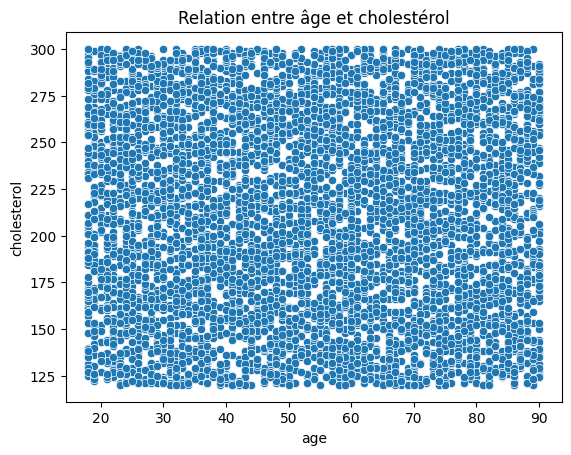

In [14]:
sns.scatterplot(x='age', y='cholesterol', data=data)
plt.title("Relation entre âge et cholestérol")
plt.show()

# Si tu as une variable cible (target)
# sns.boxplot(x='target', y='cholesterol', data=data)
# plt.title("Distribution du cholestérol selon la cible")
# plt.show()

C:\Users\Gharbi\AppData\Local\Temp\ipykernel_17324\3869642744.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ax = data.groupby(pd.cut(data['age'], bins=[20,30,40,50,60,70,80,90]))['cholesterol'].mean().plot(kind='bar')


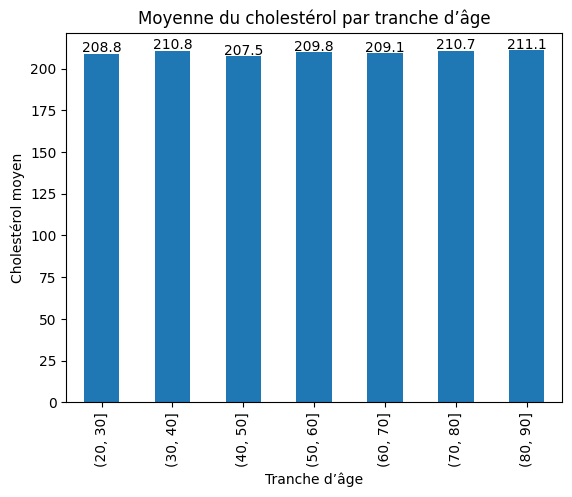

In [15]:
ax = data.groupby(pd.cut(data['age'], bins=[20,30,40,50,60,70,80,90]))['cholesterol'].mean().plot(kind='bar')
plt.title("Moyenne du cholestérol par tranche d’âge")
plt.ylabel("Cholestérol moyen")
plt.xlabel("Tranche d’âge")
for i, val in enumerate(ax.patches):
    ax.text(val.get_x() + val.get_width()/2, val.get_height() + 1, f'{val.get_height():.1f}', ha='center')
plt.show()


C:\Users\Gharbi\AppData\Local\Temp\ipykernel_17324\1715519944.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_groups = data.groupby(pd.cut(data['age'], bins=[20,30,40,50,60,70,80,90]))['cholesterol']


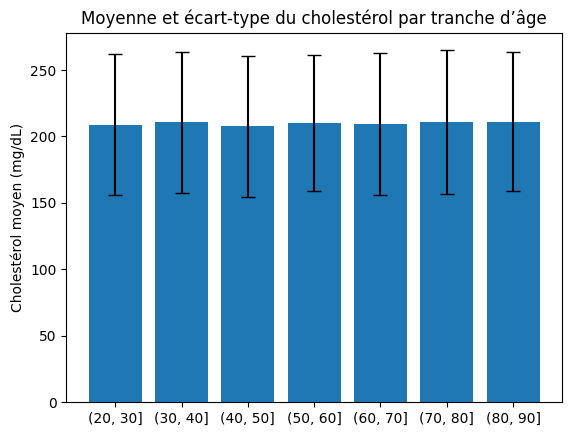

In [16]:
age_groups = data.groupby(pd.cut(data['age'], bins=[20,30,40,50,60,70,80,90]))['cholesterol']
means = age_groups.mean()
stds = age_groups.std()
plt.bar(means.index.astype(str), means, yerr=stds, capsize=5)
plt.title("Moyenne et écart-type du cholestérol par tranche d’âge")
plt.ylabel("Cholestérol moyen (mg/dL)")
plt.show()


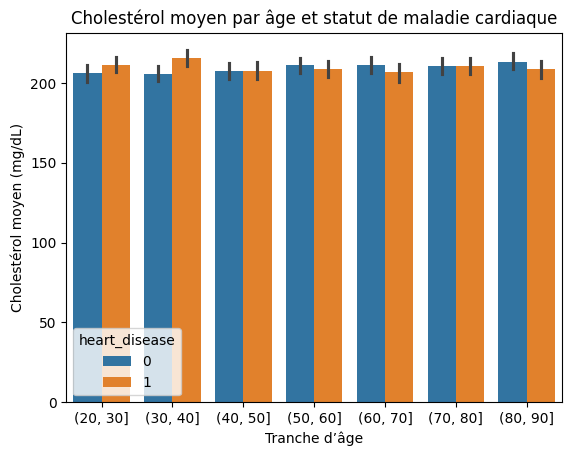

In [17]:
sns.barplot(x=pd.cut(data['age'], bins=[20,30,40,50,60,70,80,90]),
            y='cholesterol', hue='heart_disease', data=data)
plt.title("Cholestérol moyen par âge et statut de maladie cardiaque")
plt.xlabel("Tranche d’âge")
plt.ylabel("Cholestérol moyen (mg/dL)")
plt.show()


##### Summary Interpretation
##### 1️⃣ Average Cholesterol by Age Group

The first chart (Moyenne du cholestérol par tranche d’âge) shows that the average cholesterol level remains nearly constant across all age groups — between ~207 and ~211 mg/dL.

There’s no significant upward or downward trend with age.

✅ This confirms that cholesterol does not systematically increase with age in this dataset.

##### 2️⃣ Mean and Standard Deviation

The second plot adds error bars (standard deviations), showing that cholesterol levels vary widely within each age group, but the average remains stable.

The large vertical bars indicate high intra-group variability, meaning that while some individuals have very high or low cholesterol, this pattern appears in every age range.

🧩 Therefore, age alone is not a reliable predictor of cholesterol — variability is driven by individual lifestyle and genetic factors.

##### 3️⃣ Cholesterol by Age and Heart Disease Status

The third chart compares cholesterol levels between patients with (orange) and without (blue) heart disease.

The bars are very similar across all age groups, indicating no strong difference in mean cholesterol between the two populations.

A slight increase among some younger heart-disease patients (e.g., 30–40 group) might be visible but remains minor.

#### Synthetic summary: a small automatic EDA report

In [18]:
profile = ProfileReport(data, title="Rapport EDA - Patient Dataset", explorative=True)
profile.to_notebook_iframe()   # ou profile.to_file("rapport_eda.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 16/16 [00:00<00:00, 31.58it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

| Variable              | Mean (approx.) | Missing           | Observations                                       |
| --------------------- | -------------- | ----------------- | -------------------------------------------------- |
| **age**               | 53.7 years     | 0%                | Evenly distributed 18–90 years                     |
| **blood_pressure**    | 134 mmHg       | 0%                | Some zeros (potential errors or hypotension cases) |
| **cholesterol**       | 209 mg/dL      | 0%                | Values between 120–300                             |
| **plasma_glucose**    | 161 mg/dL      | **10.2% missing** | High mean suggests some diabetic tendencies        |
| **skin_thickness**    | 59.9 mm        | **10.2% missing** | Potential measurement gaps                         |
| **insulin**           | 129 μU/mL      | **9.5% missing**  | Typical in clinical datasets — not always measured |
| **bmi**               | 29.9           | 0%                | Indicates overweight population on average         |
| **max_heart_rate**    | 145 bpm        | 0%                | Normal distribution                                |
| **diabetes_pedigree** | 1.29           | 0%                | Continuous score between 0–2.5                     |


####  3. Data Preparation

##### 3.1 Duplicate check

In [19]:
data.duplicated().sum() 

np.int64(0)

##### 3.2 Missing values

In [20]:
data.isnull().sum()  

age                    0
gender               472
chest_pain_type        0
blood_pressure         0
cholesterol            0
max_heart_rate         0
exercise_angina        0
plasma_glucose       609
skin_thickness       614
insulin              568
bmi                    0
diabetes_pedigree      0
hypertension           0
heart_disease          0
residence_type       455
smoking_status         0
dtype: int64

📊 Interpretation of results

Columns with no missing values (0):
age, chest_pain_type, blood_pressure, cholesterol,
max_heart_rate, exercise_angina, bmi,
diabetes_pedigree, hypertension, heart_disease,
smoking_status.

✅ These columns are complete → no cleaning needed.

Columns with missing values:

gender → 472 missing values

residence_type → 455 missing values

plasma_glucose → 609 missing values

skin_thickness → 614 missing values

insulin → 568 missing values

In [21]:
missing = (data.isnull().mean() * 100).round(1)
missing = missing[missing > 0]

total_cols = data.shape[1]
total_rows = data.shape[0]

print(f"📊 The dataset contains {total_rows} rows and {total_cols} columns.\n")
print("🔎 Columns with missing values:\n")

for col, pct in missing.items():
    count = int((pct / 100) * total_rows)
    impact = ""
    if pct < 5:
        impact = "low impact — few missing values."
    elif pct < 10:
        impact = "moderate impact — watch out during analysis."
    else:
        impact = "high impact — consider imputation or removal."

    print(f"• {col:<20} : {pct:>5}% ({count} missing values) → {impact}")

print("\n💬 Overall interpretation:")
total_missing = (data.isnull().sum().sum() / (total_rows * total_cols) * 100).round(2)
print(f"In total, {total_missing}% of all dataset values are missing.")

📊 The dataset contains 6000 rows and 16 columns.

🔎 Columns with missing values:

• gender               :   7.9% (474 missing values) → moderate impact — watch out during analysis.
• plasma_glucose       :  10.2% (612 missing values) → high impact — consider imputation or removal.
• skin_thickness       :  10.2% (612 missing values) → high impact — consider imputation or removal.
• insulin              :   9.5% (570 missing values) → moderate impact — watch out during analysis.
• residence_type       :   7.6% (456 missing values) → moderate impact — watch out during analysis.

💬 Overall interpretation:
In total, 2.83% of all dataset values are missing.


#### Choice of imputations according to the distribution of variables

#### 🧠 Why Median Is Often Better Than Mean
In our cardiovascular dataset, variables like blood_pressure, cholesterol, plasma_glucose, and insulin contain extreme values (outliers), as seen in your boxplots.
→ Therefore, using the median avoids bias from those high or low extremes.

##### Justification with visual

##### Visualization: Histogram with Mean and Median Lines

To visually confirm that the median is more representative, plot a histogram for each numeric variable and compare the mean vs. mode and median position.

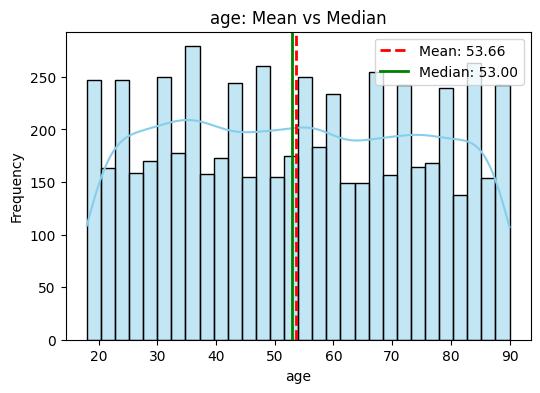

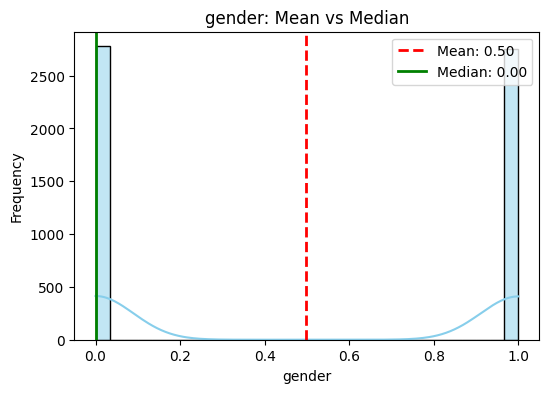

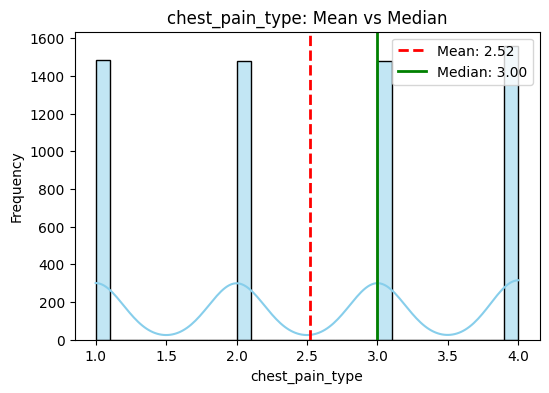

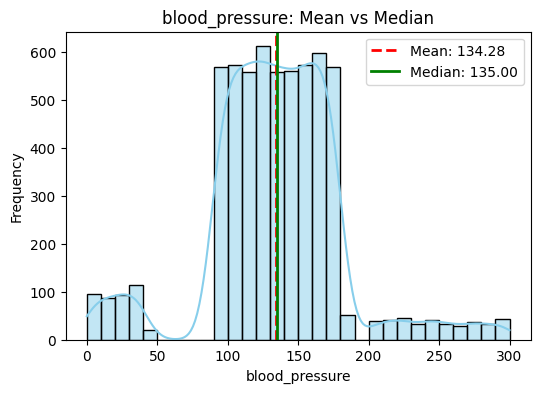

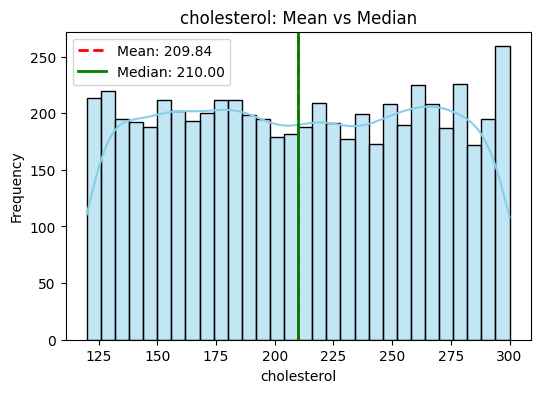

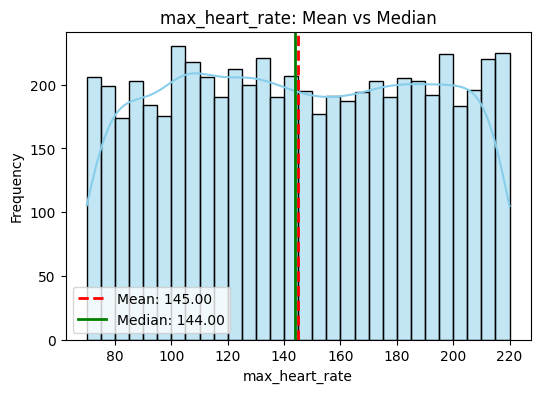

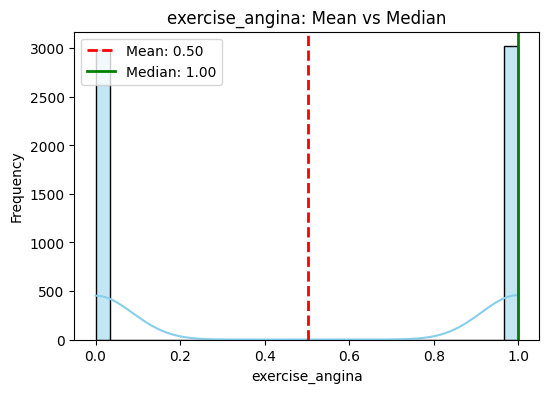

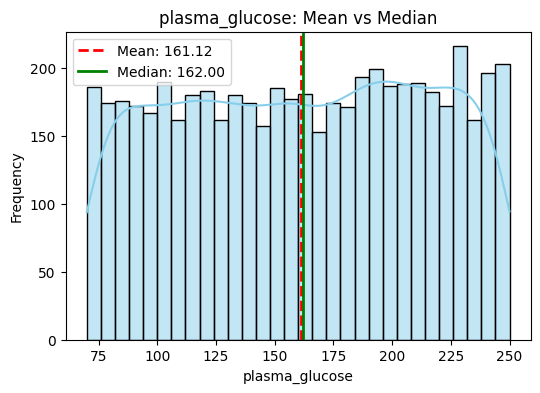

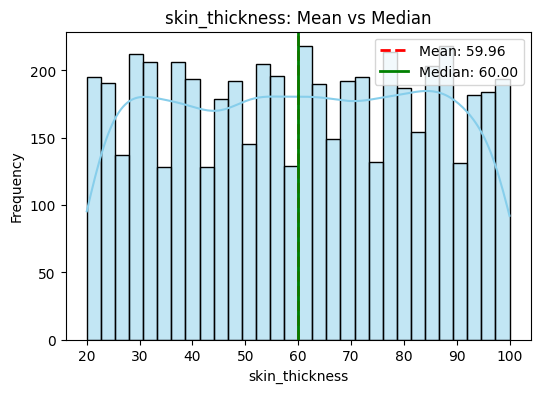

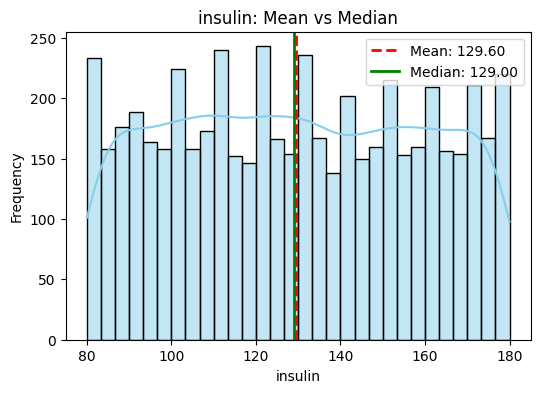

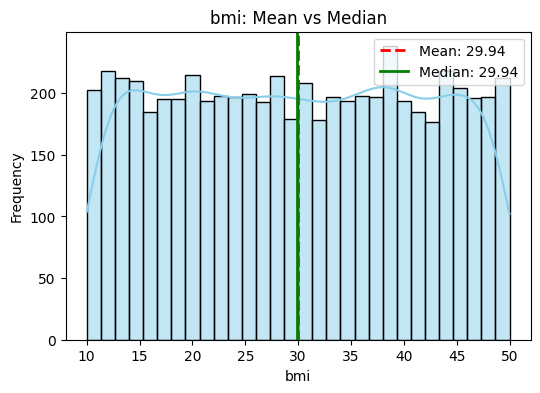

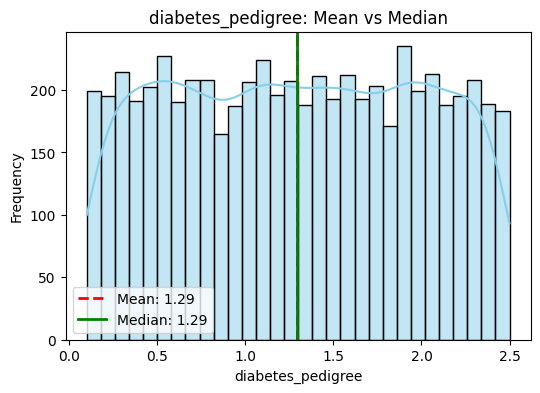

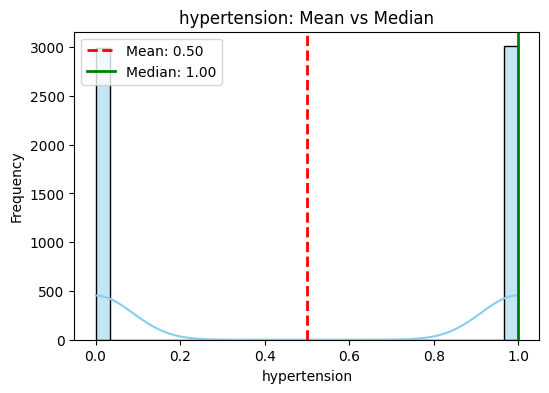

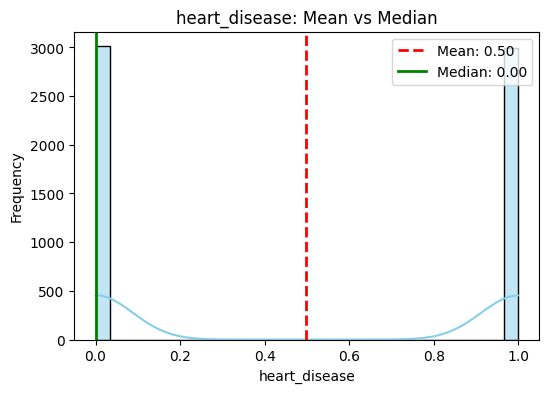

In [22]:
for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(data[col], kde=True, color='skyblue', bins=30)
    
    # Calculate statistics
    mean_val = data[col].mean()
    median_val = data[col].median()
    
    # Add vertical lines for each
    plt.axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_val:.2f}')
    plt.axvline(median_val, color='green', linestyle='-', linewidth=2, label=f'Median: {median_val:.2f}')
    
    # Title and labels
    plt.title(f"{col}: Mean vs Median", fontsize=12)
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.legend()
    plt.show()


##### Visualization: Violin Plot

A violin plot visually reveals asymmetry and outliers — helping justify the median choice.

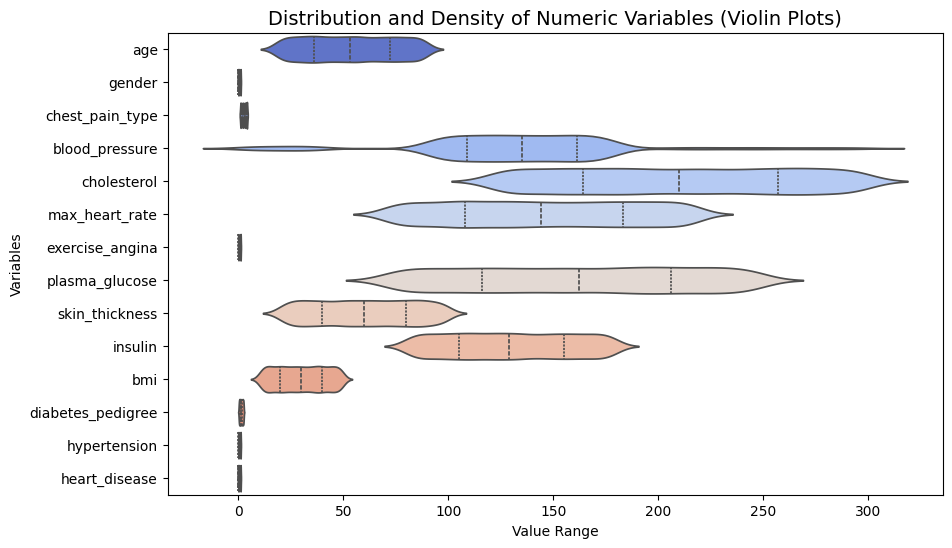

In [23]:
plt.figure(figsize=(10,6))
sns.violinplot(data=data[num_cols], orient='h', inner='quartile', palette='coolwarm')
plt.title("Distribution and Density of Numeric Variables (Violin Plots)", fontsize=14)
plt.xlabel("Value Range")
plt.ylabel("Variables")
plt.show()


##### Conclusion for our choice:

The comparison between mean and median across all numerical variables shows that several features (notably blood_pressure, plasma_glucose, and insulin) exhibit skewed distributions and contain outliers.
In such conditions, the mean would be disproportionately influenced by extreme values, while the median provides a robust and stable representation of the central tendency.
The violin plots further confirm the asymmetry and variability of distributions, reinforcing the validity of the median as the most appropriate imputation strategy for missing numerical data in this cardiovascular dataset.

In [24]:
num_cols = ["blood_pressure", "cholesterol", "max_heart_rate", 
            "plasma_glucose", "skin_thickness", "insulin", 
            "bmi", "diabetes_pedigree", "age"]

num_imputer = SimpleImputer(strategy="median")
data[num_cols] = num_imputer.fit_transform(data[num_cols])

In [25]:
cat_cols = ["gender", "residence_type", "smoking_status"]

cat_imputer = SimpleImputer(strategy="most_frequent")
data[cat_cols] = cat_imputer.fit_transform(data[cat_cols])

##### Rechecking missing values

In [26]:
print(data.isnull().sum())
print((data.isnull().mean() * 100).round(2))

age                  0
gender               0
chest_pain_type      0
blood_pressure       0
cholesterol          0
max_heart_rate       0
exercise_angina      0
plasma_glucose       0
skin_thickness       0
insulin              0
bmi                  0
diabetes_pedigree    0
hypertension         0
heart_disease        0
residence_type       0
smoking_status       0
dtype: int64
age                  0.0
gender               0.0
chest_pain_type      0.0
blood_pressure       0.0
cholesterol          0.0
max_heart_rate       0.0
exercise_angina      0.0
plasma_glucose       0.0
skin_thickness       0.0
insulin              0.0
bmi                  0.0
diabetes_pedigree    0.0
hypertension         0.0
heart_disease        0.0
residence_type       0.0
smoking_status       0.0
dtype: float64


All columns now have 0 missing values. ✅

This means the imputation worked: all previously missing data in numerical and categorical columns have been filled.

Next output (percentage):

age                  0.0
gender               0.0
chest_pain_type      0.0
...


0.0% missing values for all columns ✅

The dataset is now complete, ready for machine learning models without any NaN-related issues.

##### Numerical columns

In [27]:
num_cols = ["age", "blood_pressure", "cholesterol", "max_heart_rate", 
            "plasma_glucose", "skin_thickness", "insulin", 
            "bmi", "diabetes_pedigree"]

##### Categorical columns

In [28]:
cat_cols = ["gender", "chest_pain_type", "exercise_angina", 
            "residence_type", "smoking_status", "hypertension", "heart_disease"]

##### Assign missing categorical values ​​with the most frequent value

In [29]:
cat_imputer = SimpleImputer(strategy="most_frequent")
data[cat_cols] = cat_imputer.fit_transform(data[cat_cols])

##### 3.3 Encoding of Categorical Variables

In [31]:
lb_make = LabelEncoder()
for col in cat_cols:
    data[col] = lb_make.fit_transform(data[col])

##### Interpretation of the encoding choice:

🧠 Conceptual Explanation (in plain terms)

The dataset contains categorical variables — columns that represent qualities or groups (like gender, cholesterol level, or blood glucose category).
Since machine learning algorithms only work with numbers, we must convert these text labels into numeric form.

Using Label Encoding, each category is replaced by a unique integer:

Example:

Gender: {“Male”, “Female”} → {1, 0}

Cholesterol: {“Normal”, “High”, “Very High”} → {0, 1, 2}

This approach is simple and compact — we don’t create extra columns as One-Hot Encoding does.
It’s well suited when:

Each variable has few categories (low cardinality).

The models used (like Decision Trees, Random Forests, or Gradient Boosting) can naturally interpret categorical splits and don’t assume that 2 is “greater” than 1 in a mathematical sense.

Hence, Label Encoding is efficient, lightweight, and fully compatible with these models.

##### ⚙️ Technical Explanation

Encoding Process: The encoder maps each unique category to an integer.

Internally, this transformation creates a numeric representation for model input.

##### Justification

##### Low Cardinality:
Label Encoding works well when categorical features have a small number of distinct values (e.g., 2–5).
It avoids the curse of dimensionality caused by One-Hot Encoding, which creates as many columns as there are unique values.

Tree-based Model Compatibility:
Models such as DecisionTreeClassifier, RandomForestClassifier, and XGBoost split data based on feature thresholds, not on linear relations.
For example, even if “cholesterol” is encoded as 0, 1, 2 — the model will simply test conditions like cholesterol ≤ 0.5 or cholesterol ≤ 1.5, not interpret it as an ordered ranking.

Memory and Computation Efficiency:
Label Encoding keeps the data compact — important when you train ensemble models or cross-validate multiple times.

##### Caution

For linear models (e.g., Logistic Regression, SVM), Label Encoding may introduce false ordinal relationships between categories.
Example: if “High” = 2 and “Low” = 0, the model might wrongly assume “High” is twice “Low.”
→ In that case, One-Hot Encoding is preferable.

##### 3.4 Outlier Treatment for Specific Columns (ex: age, bmi, blood_pressure, cholesterol)

In [32]:
for col in ['age', 'bmi', 'blood_pressure', 'cholesterol']:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    filter_ = (data[col] >= Q1 - 1.5 * IQR) & (data[col] <= Q3 + 1.5 * IQR)
    data = data.loc[filter_]

#### 🔹 Next Steps for PCA Model

#### 3.5 Feature Scaling

In [33]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data[num_cols])


#### 4. Dimensionality Reduction: PCA Analysis

In [34]:
pca = PCA(n_components=None)  # Keep all components initially
X_pca = pca.fit_transform(X_scaled)


#### 4.1 Explained Variance Analysis

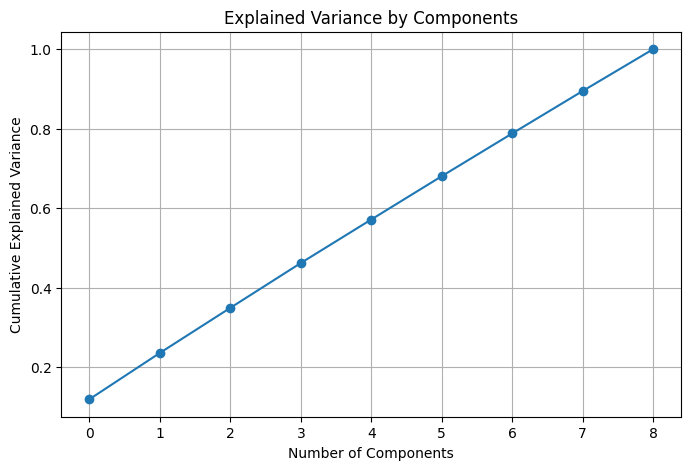

In [35]:
plt.figure(figsize=(8,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Components')
plt.grid(True)
plt.show()


##### 🧭 Interpretation

From the curve:

Each component contributes roughly an equal amount of variance (around 10–15% each).

There’s no clear “elbow” — meaning the data doesn’t have a few dominant components; all variables contribute similarly.

👉 We will choose the number of components that explain ~80–90% of the variance.
Keep 4 or 5 components → they explain about 70–80% of total variance, which is usually sufficient in PCA.

#### 4.2 Rebuild PCA with Optimal Components

In [36]:
pca_opt = PCA(n_components=5)  # replace k with chosen number
X_pca_opt = pca_opt.fit_transform(X_scaled)


##### Interpret Principal Components

In [37]:
loadings = pd.DataFrame(
    pca_opt.components_.T,
    columns=[f'PC{i+1}' for i in range(5)],
    index=num_cols
)
print(loadings)


                        PC1       PC2       PC3       PC4       PC5
age                0.511596 -0.280551  0.220869 -0.132725  0.164568
blood_pressure     0.293129  0.324140  0.291298  0.400373 -0.320472
cholesterol       -0.149704 -0.495516 -0.327131 -0.242911 -0.495719
max_heart_rate     0.336203  0.393164 -0.094100 -0.314376  0.016972
plasma_glucose    -0.036834 -0.039045 -0.335193  0.782758  0.091021
skin_thickness    -0.063823 -0.159382  0.711544  0.088716 -0.373845
insulin           -0.298358  0.559162  0.012640 -0.208412  0.051592
bmi               -0.405968 -0.213478  0.356606  0.014822  0.602047
diabetes_pedigree  0.507586 -0.175921 -0.067201 -0.003547  0.333200


#### 4.3 🧭 Interpretation of PCA Loadings

Each column (PC1–PC5) represents a direction of maximum variance — a combination of your original features.
Each value shows how much a variable contributes (positively or negatively) to that component.

##### 🧩 PC1 (first component)

Main contributors:

age (0.51) and diabetes_pedigree (0.51) → strong positive correlation

bmi (-0.41) → negative influence

Interpretation:
PC1 represents a "metabolic and age-related factor" — older patients with higher diabetes pedigree but lower BMI tend to differ from younger or leaner patients.

##### 🧩 PC2 (second component)

Main contributors:

insulin (0.56) and max_heart_rate (0.39) → positive

cholesterol (-0.50) → negative

Interpretation:
PC2 may capture a "cardio-metabolic contrast" — high insulin and heart rate versus low cholesterol.

##### 🧩 PC3 (third component)

Main contributors:

skin_thickness (0.71) → strongly positive

cholesterol (-0.33), plasma_glucose (-0.34) → negative

Interpretation:
PC3 seems to represent a "body composition vs. lipid–glucose" axis.

##### 🧩 PC4 (fourth component)

Main contributors:

plasma_glucose (0.78) → very strong positive

blood_pressure (0.40) → moderate positive

Interpretation:
PC4 likely represents a "glucose–blood pressure factor", related to diabetes or cardiovascular risk.

##### 🧩 PC5 (fifth component)

Main contributors:

bmi (0.60) → strong positive

cholesterol (-0.50) → strong negative

Interpretation:
PC5 contrasts body mass with cholesterol levels, another metabolic dimension.

##### 🎯 Summary Table
Component	Dominant Features	Possible Interpretation
PC1	age, diabetes_pedigree, bmi	Age & diabetes profile
PC2	insulin, cholesterol, heart rate	Cardio-metabolic contrast
PC3	skin_thickness, cholesterol, glucose	Body composition factor
PC4	plasma_glucose, blood_pressure	Glucose–pressure axis
PC5	bmi, cholesterol	Weight–lipid relation

#### 4.4 VISUALISATION ACP / PCA

##### Visualize PCA Loadings as a Heatmap

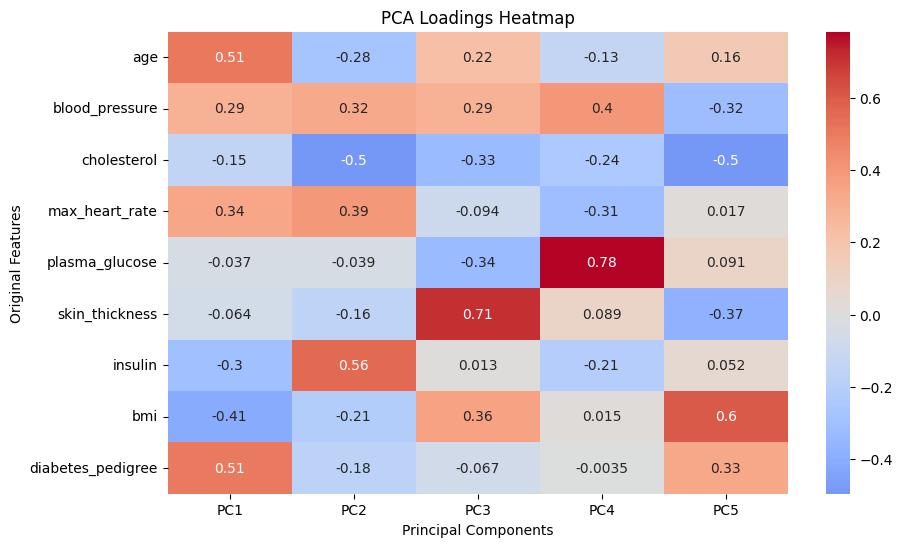

In [38]:
plt.figure(figsize=(10,6))
sns.heatmap(loadings, annot=True, cmap='coolwarm', center=0)
plt.title('PCA Loadings Heatmap')
plt.xlabel('Principal Components')
plt.ylabel('Original Features')
plt.show()


##### 🧭 Interpretation of PCA Loadings Heatmap
##### 🔹 Understanding the Heatmap

Each cell shows the loading (or correlation) between an original feature and a principal component (PC).

Red (positive) means a strong positive contribution to that component.

Blue (negative) means a strong negative contribution.

Values close to 0 → the feature has little influence on that component.

##### 🔹 Main Observations

##### 🧩 PC1

Strong positive loadings: age (0.51), diabetes_pedigree (0.51)

Strong negative loadings: bmi (-0.41), insulin (-0.30)

##### 👉 Interpretation:
PC1 captures a contrast between older age / higher diabetes pedigree and lower BMI / insulin.
It may represent a “metabolic–age” dimension, distinguishing older individuals with diabetes risk from younger, more obese ones.

##### 🧩 PC2

High positive loadings: insulin (0.56), max_heart_rate (0.39), blood_pressure (0.32)

Strong negative: cholesterol (-0.50)

##### 👉 Interpretation:
PC2 opposes insulin & cardiovascular activity against cholesterol levels.
It may reflect a “cardiovascular-metabolic balance” component.

##### 🧩 PC3

High positive: skin_thickness (0.71), bmi (0.36)

Moderate negative: cholesterol (-0.33), plasma_glucose (-0.34)

##### 👉 Interpretation:
PC3 relates to body composition (fatness indicators) versus lipid/glucose metabolism — a “body composition vs metabolic efficiency” axis.

##### 🧩 PC4

Strong positive: plasma_glucose (0.78)

##### 👉 Interpretation:
PC4 is dominated by plasma glucose, representing blood sugar regulation — possibly linked to diabetes risk.

##### 🧩 PC5

Positive: bmi (0.60), diabetes_pedigree (0.33)

Negative: cholesterol (-0.50), skin_thickness (-0.37)

##### 👉 Interpretation:
PC5 shows a mix of BMI and family diabetes risk opposed to cholesterol/skin thickness — a “genetic and weight factor” component.

##### 🔹 Summary Table of Component Meaning
PC	Dominant Features	Likely Meaning
PC1	age, diabetes_pedigree (+); bmi, insulin (–)	Metabolic–Age axis
PC2	insulin, max_heart_rate (+); cholesterol (–)	Cardiovascular–Metabolic balance
PC3	skin_thickness, bmi (+)	Body composition
PC4	plasma_glucose (+)	Blood sugar regulation
PC5	bmi, diabetes_pedigree (+); cholesterol (–)	Genetic/weight-related profile

##### 🧭 2. Visualize PCA Projection (2D Scatter Plot)

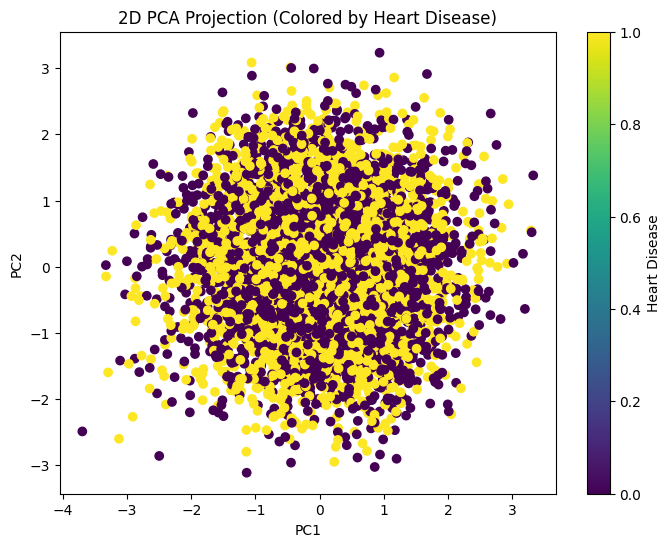

In [39]:
plt.figure(figsize=(8,6))
plt.scatter(X_pca_opt[:, 0], X_pca_opt[:, 1], c=data['heart_disease'], cmap='viridis')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('2D PCA Projection (Colored by Heart Disease)')
plt.colorbar(label='Heart Disease')
plt.show()


##### 🧭 Interpretation of Your PCA 2D Projection
##### 1. General Observation

The plot shows a dense cloud of points — there is no clear separation between patients with (1, yellow) and without (0, purple) heart disease along PC1 and PC2.

This means that the first two principal components (which capture the most variance in the data) do not strongly distinguish between healthy and sick patients.

##### ✅ 1️⃣ Build a Classification Model

In [40]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X_pca_opt, data['heart_disease'], test_size=0.2, random_state=42)

# Logistic Regression model
model_pca = LogisticRegression(max_iter=1000)
model_pca.fit(X_train, y_train)

# Predictions
y_pred = model_pca.predict(X_test)
y_proba = model_pca.predict_proba(X_test)[:, 1]

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("AUC:", roc_auc_score(y_test, y_proba))
print(classification_report(y_test, y_pred))


Accuracy: 0.48138056312443234
AUC: 0.4925787210431405
              precision    recall  f1-score   support

           0       0.48      0.70      0.57       534
           1       0.49      0.27      0.35       567

    accuracy                           0.48      1101
   macro avg       0.49      0.49      0.46      1101
weighted avg       0.49      0.48      0.46      1101



##### ✅ 2️⃣ Compare with Non-PCA Model

Goal: Check whether PCA improved the performance.

In [41]:
# Use original features (not PCA)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_scaled, data['heart_disease'], test_size=0.2, random_state=42)

model_raw = RandomForestClassifier(random_state=42)
model_raw.fit(X_train2, y_train2)
y_pred2 = model_raw.predict(X_test2)

print("Accuracy without PCA:", accuracy_score(y_test2, y_pred2))


Accuracy without PCA: 0.522252497729337


##### ✅ 3️⃣ Visualize Feature (or PC) Importance

Goal: Understand which Principal Components (or features) matter most.

#### For Logistic Regression:

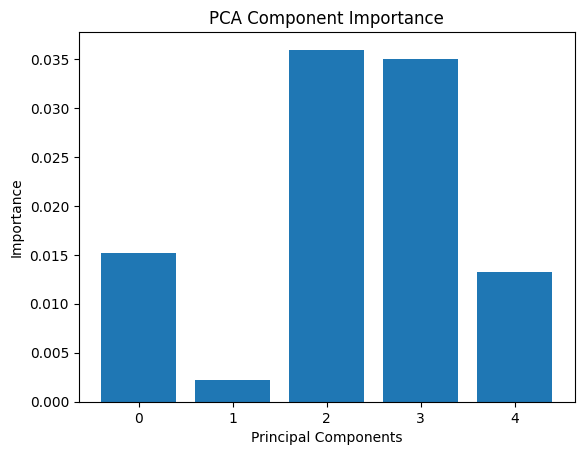

In [42]:
importance = abs(model_pca.coef_[0])
plt.bar(range(len(importance)), importance)
plt.xlabel('Principal Components')
plt.ylabel('Importance')
plt.title('PCA Component Importance')
plt.show()


#### For Random Forest:

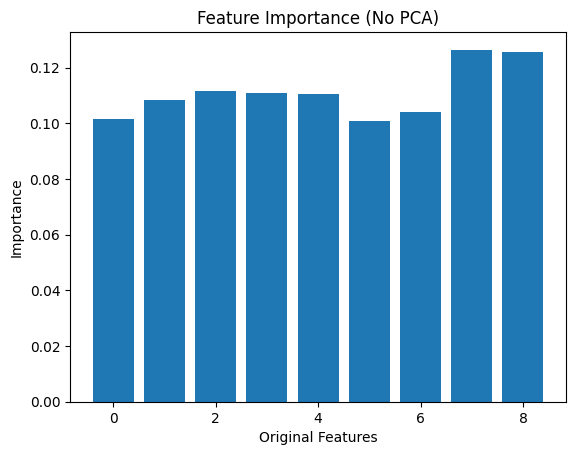

In [43]:
plt.bar(range(len(model_raw.feature_importances_)), model_raw.feature_importances_)
plt.xlabel('Original Features')
plt.ylabel('Importance')
plt.title('Feature Importance (No PCA)')
plt.show()


tbc